In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/loan_prediction.csv')

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Propert_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df = df.drop('Loan_ID', axis =1)

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Propert_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Propert_Area          0
Loan_Status           0
dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Propert_Area       614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [ ]:
import seaborn as sns

<Axes: xlabel='Loan_Status', ylabel='count'>

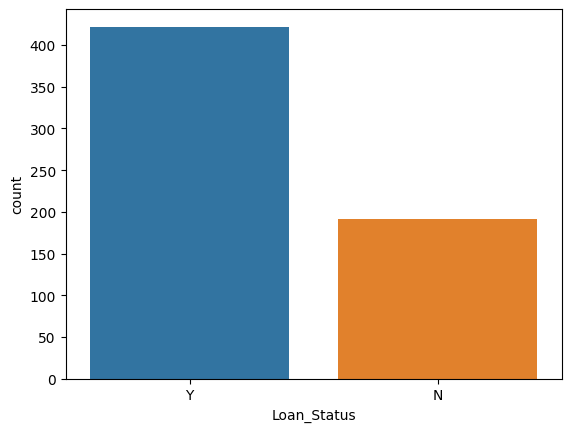

In [ ]:
sns.countplot(x = df['Loan_Status'])

<Axes: xlabel='Gender', ylabel='count'>

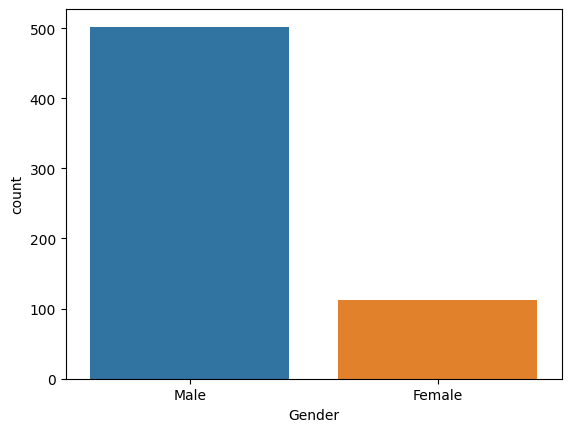

In [ ]:
sns.countplot(x = df['Gender'])

<Axes: xlabel='Married', ylabel='count'>

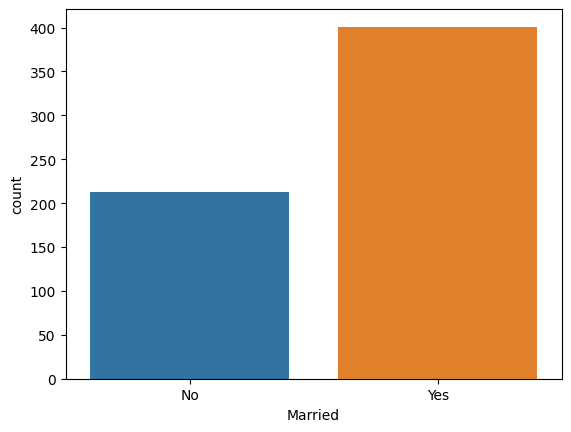

In [ ]:
sns.countplot(x = df['Married'])

<Axes: xlabel='Education', ylabel='count'>

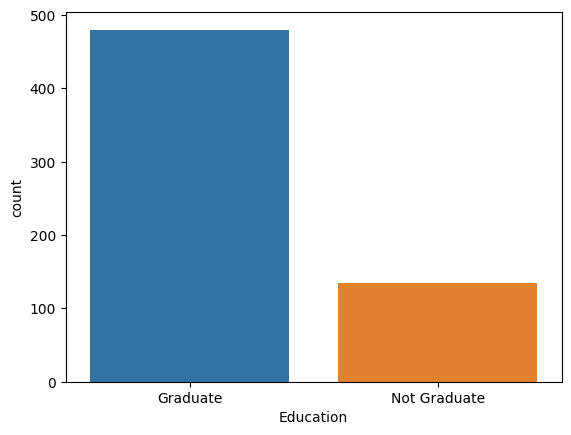

In [ ]:
sns.countplot(x = df['Education'])

<Axes: xlabel='Self_Employed', ylabel='count'>

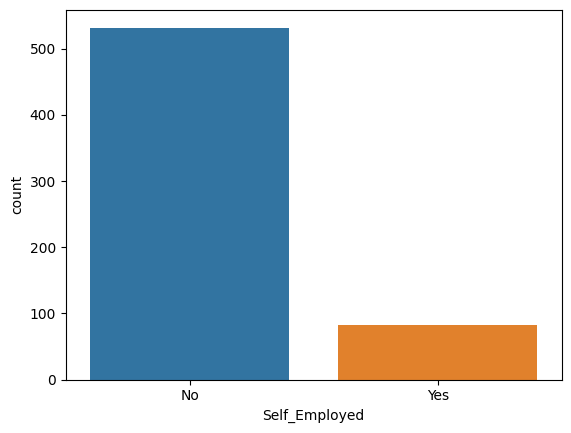

In [ ]:
sns.countplot(x = df['Self_Employed'])

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

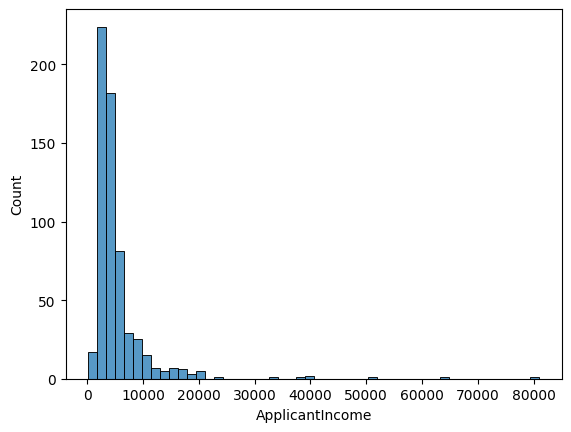

In [ ]:
sns.histplot(df['ApplicantIncome'], bins=50)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

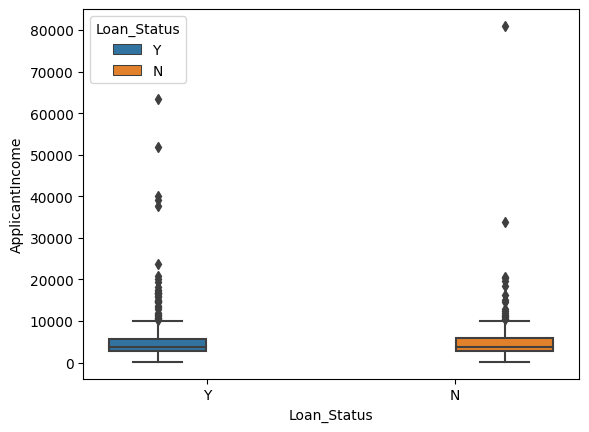

In [ ]:
sns.boxplot(x=df['Loan_Status'], y=df['ApplicantIncome'], data=df['ApplicantIncome'], hue=df['Loan_Status'])

In [ ]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['ApplicantIncome'] >= lower) & (df['ApplicantIncome'] <= upper)]

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

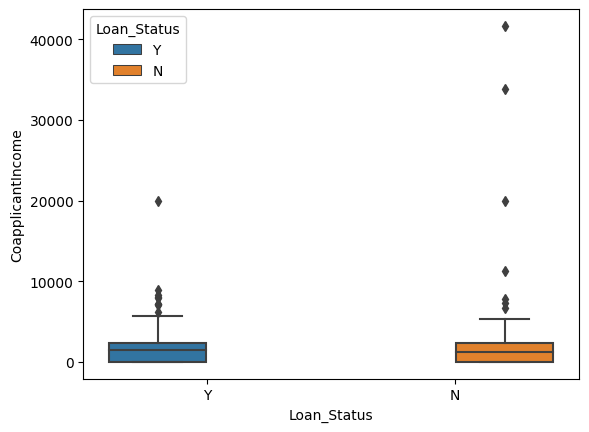

In [ ]:
sns.boxplot(x=df['Loan_Status'], y=df['CoapplicantIncome'], data=df['CoapplicantIncome'], hue=df['Loan_Status'])

In [ ]:
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['CoapplicantIncome'] >= lower) & (df['CoapplicantIncome'] <= upper)]

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

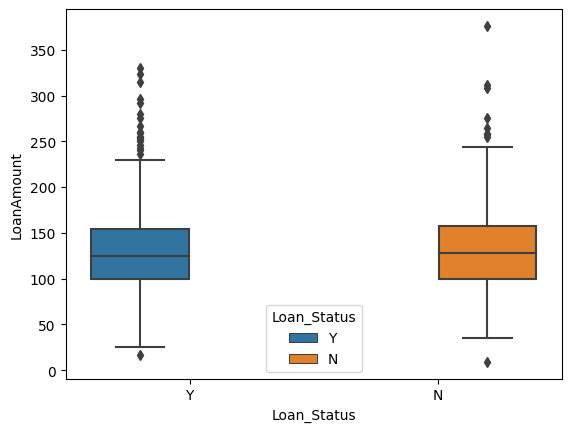

In [ ]:
sns.boxplot(x=df['Loan_Status'], y=df['LoanAmount'], data=df['LoanAmount'], hue=df['Loan_Status'])

<Axes: xlabel='Credit_History', ylabel='Count'>

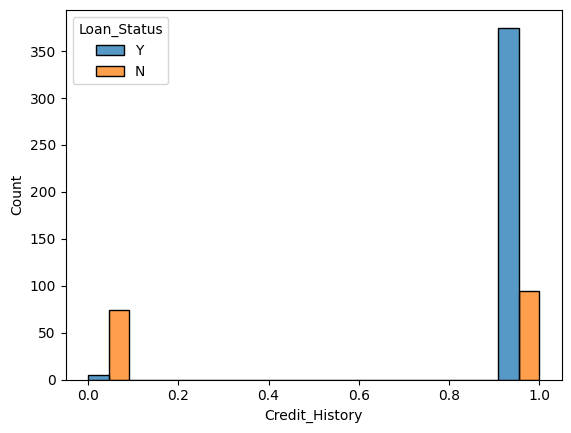

In [ ]:
sns.histplot(data=df['Credit_History'], x=df['Credit_History'], hue=df['Loan_Status'], multiple = 'dodge')

<Axes: xlabel='Propert_Area', ylabel='count'>

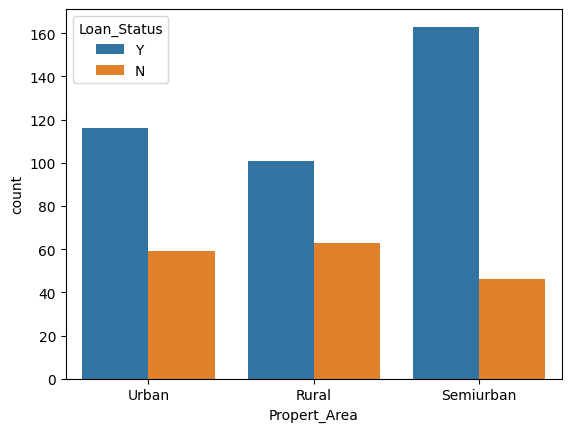

In [ ]:
sns.countplot(x=df['Propert_Area'], hue=df['Loan_Status'], data=df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#converting categorical values into numerical
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Propert_Area']
df = pd.get_dummies(df, columns = cat_cols)

In [ ]:
X = df.drop('Loan_Status', axis =1)
y = df['Loan_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 45)

In [ ]:
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

In [ ]:
from sklearn.svm import SVC
model = SVC(random_state = 45)
model.fit(X_train, y_train)

SVC(random_state=45)

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8175182481751825
